# 24 Series de tiempo

## Pasos iniciales

In [1]:
import pandas as pd
pd.__version__

'1.3.1'

In [ ]:
pd.read_csv("../datasets")

In [2]:
df = pd.read_csv('../../datasets/covid_19_data.csv')
df.sample(8)


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
416,417,01/30/2020,NaN,France,1/30/20 16:00,5.0,0.0,0.0
1246,1247,02/11/2020,South Australia,Australia,2020-02-02T22:33:07,2.0,0.0,0.0
1812,1813,02/19/2020,Shanxi,Mainland China,2020-02-19T23:53:02,131.0,0.0,68.0
2082,2083,02/22/2020,"Toronto, ON",Canada,2020-02-21T05:23:04,2.0,0.0,2.0
1042,1043,02/08/2020,NaN,Spain,2020-02-01T23:43:02,1.0,0.0,0.0
2018,2019,02/21/2020,"Humboldt County, CA",US,2020-02-21T05:13:09,1.0,0.0,0.0
413,414,01/30/2020,NaN,South Korea,1/30/20 16:00,4.0,0.0,0.0
626,627,02/02/2020,"Tempe, AZ",US,2020-02-01T19:43:03,1.0,0.0,0.0


In [19]:
df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

Convertimos la columna de tiempo con `to_datetime()`


In [3]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [21]:
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [22]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

Con ésta lista me ayudo para seleccionar solo los datos con los que quiero trabajar


In [4]:
df = df[['ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered']]
df.sample(5)

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
1391,2020-02-13,Philippines,3.0,1.0,1.0
850,2020-02-06,Mainland China,215.0,0.0,14.0
1414,2020-02-13,US,1.0,0.0,0.0
1973,2020-02-21,Mainland China,75.0,0.0,17.0
3069,2020-03-02,US,1.0,0.0,0.0


In [6]:
df.dtypes

ObservationDate    datetime64[ns]
Country/Region             object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

## Agrupando por fechas

In [ ]:
df.groupby('ObservationDate')

In [7]:
df_time = df.groupby('ObservationDate').sum()
df_time.head(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [8]:
type(df_time)

pandas.core.frame.DataFrame

Para cada uno de los días veo el número de casos. Ahora vamos a hacer una selección de datos, recordemos que los datos están agrupados por fecha de observación.

In [9]:
#hacemos 2 dataframes con 5 registros cada uno
df1 = df_time['Confirmed'].iloc[10:15]
df2 = df_time['Deaths'].iloc[12:17]

In [10]:
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

In [11]:
df2.dtypes

dtype('float64')

Tenemos 2 dataframes y cada unoi tiene como índice las fechas de observación.

Cuando tenemos dos dataframes con un sistema de índices por fecha, podemos hacer operaciones entre las mismas, y se relacionarán dado el índice de fecha


In [12]:
# confirmados menos los muertos, cua´ntos sobreviven
df1 - df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

Nuestro dataframe contiene todos los casos desde el primer día de observación, en este caso, 22 de enero.

In [13]:
df_time.head(6)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
2020-01-27,2927.0,82.0,61.0


## Obteniendo información con dataframes de Fechas

### Diferencias

para ver la diferencia día tras dia , es decir a un día le restamos el numero de casos del día anterior; para ello usamos `.diff()`, que es la diferencia.
Con ello obtengo el número de casos nuevos

In [14]:
df_time.diff()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
2020-01-27,809.0,26.0,9.0
2020-01-28,2651.0,49.0,46.0
2020-01-29,587.0,2.0,19.0
2020-01-30,2070.0,38.0,17.0


Si aplicamos el promedio, veremos el numero de nuevos casos en promedio por día

In [15]:
df_time.diff().mean()

Confirmed    2251.642857
Deaths         77.071429
Recovered    1217.690476
dtype: float64

Para solucionar el NaN que aparece en el inicio del datase de diferencias, podemos obtener el dato original y escribirlo en esa fila. - primero guardamos el df de diferencias en un dataframe nuevo
- luego obtenemos la primera fila del data original, con ayuda de `head(1)` y el resultado lo guardamos en un diccionario
- usando `.fillna` rellenamos los vaores vacios de la primera fila

In [16]:
df_diff = df_time.diff()

In [17]:
dict_1=df_time.head(1).to_dict()

In [37]:
dict_1

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 555.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 28.0}}

In [18]:
df_diff=df_diff.fillna(dict_1)

In [19]:
df_diff.head(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0


### Suma acumulada

Al aplicar `.cumsum()` (suma acumulativa) vemos los datos originales

In [20]:
df_diff.cumsum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
2020-01-27,2927.0,82.0,61.0
2020-01-28,5578.0,131.0,107.0
2020-01-29,6165.0,133.0,126.0
2020-01-30,8235.0,171.0,143.0


### remuestreo en series de tiempo .resample

Con `resample()` podemos hacer estimaciones estadísticas

In [22]:
#datos acumulados cada siete días
df_diff.resample('7D').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5578.0,131.0,107.0
2020-01-29,18314.0,361.0,745.0
2020-02-05,20911.0,621.0,3831.0
2020-02-12,30335.0,894.0,9669.0
2020-02-19,5277.0,701.0,13553.0
2020-02-26,12429.0,452.0,20324.0
2020-03-04,2280.0,94.0,2942.0


In [23]:
#Cada domingo
df_diff.resample('W-Sun').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,2118.0,56.0,52.0
2020-02-02,14669.0,306.0,420.0
2020-02-09,23364.0,544.0,2772.0
2020-02-16,31075.0,864.0,7621.0
2020-02-23,7759.0,699.0,12529.0
2020-03-01,9386.0,527.0,19322.0
2020-03-08,6753.0,258.0,8455.0


In [24]:
df_diff.resample('M').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,222.0
2020-02-29,76088.0,2728.0,39560.0
2020-03-31,9111.0,313.0,11389.0


In [25]:
df_diff.resample('M').count()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,4,4,4


In [26]:
df_diff.resample('M').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,992.500000,21.300000,22.200000
2020-02-29,2623.724138,94.068966,1364.137931
2020-03-31,2277.750000,78.250000,2847.250000


In [ ]:
df_cum = df_time.resample('12h').sum(min_count=1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,NaN,NaN,NaN
2020-03-03 00:00:00,92844.0,3160.0,48229.0


# 25.- Series de tiempo. Variables nulas

In [ ]:
df_cum = df_cum.interpolate()
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,604.0,17.5,29.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,797.0,22.0,33.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,91576.5,3122.5,46915.5
2020-03-03 00:00:00,92844.0,3160.0,48229.0


In [ ]:
df_cum['rate'] = 1 - df_cum['Deaths']/df_cum['Confirmed']

In [ ]:
df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
1,2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2,2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
3,2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
4,2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...,...
80,2020-03-02 00:00:00,90309.0,3085.0,45602.0,0.965840
81,2020-03-02 12:00:00,91576.5,3122.5,46915.5,0.965903
82,2020-03-03 00:00:00,92844.0,3160.0,48229.0,0.965964
83,2020-03-03 12:00:00,93984.0,3207.0,49700.0,0.965877


In [ ]:
df_cum.groupby(pd.Grouper(key='ObservationDate', freq = 'M'))[['rate']].mean()

,rate
ObservationDate,
2020-01-31,0.974594
2020-02-29,0.973562
2020-03-31,0.965920


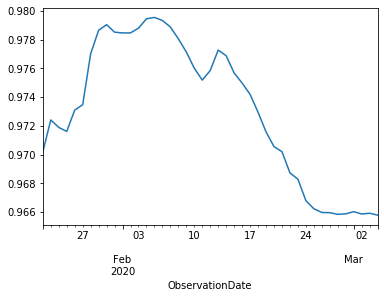

In [ ]:
sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq = '1D'))['rate'].mean()
sr.plot()

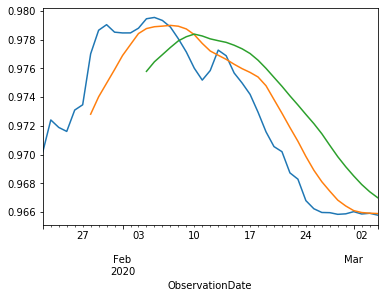

In [ ]:
sr.plot()
sr.rolling(window=7).mean().plot()
sr.rolling(window=14).mean().plot()

In [ ]:
import numpy as np

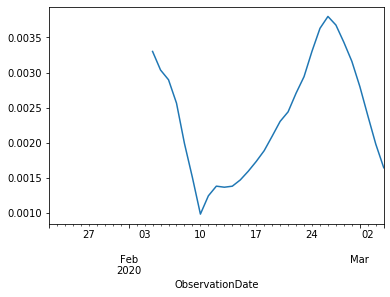

In [ ]:
sr.rolling(window=14).apply(lambda x: np.std(x)).plot()

In [ ]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)

Country/Region
Mainland China    67332.0
South Korea        5621.0
Italy              3089.0
Iran               2922.0
Others              706.0
                   ...   
Ivory Coast           1.0
Poland                1.0
Nigeria               1.0
Faroe Islands         1.0
Colombia              0.0
Name: Confirmed, Length: 90, dtype: float64

In [ ]:
list(df)

['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']

In [ ]:
df_time = df.groupby(['Country/Region',
            pd.Grouper(key='ObservationDate',freq='1D')]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region ObservationDate                              
 Azerbaijan    2020-02-28             1.0     0.0        0.0
Afghanistan    2020-02-24             1.0     0.0        0.0
               2020-02-25             1.0     0.0        0.0
               2020-02-26             1.0     0.0        0.0
               2020-02-27             1.0     0.0        0.0
...                                   ...     ...        ...
Vietnam        2020-02-29            16.0     0.0       16.0
               2020-03-01            16.0     0.0       16.0
               2020-03-02            16.0     0.0       16.0
               2020-03-03            16.0     0.0       16.0
               2020-03-04            16.0     0.0       16.0

[1462 rows x 3 columns]

In [ ]:
df_china = df_time.loc['Mainland China',:]

In [ ]:
df_china

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0
2020-01-27,2863.0,82.0,58.0
2020-01-28,5494.0,131.0,101.0
2020-01-29,6070.0,133.0,120.0
2020-01-30,8124.0,171.0,135.0


In [ ]:
import matplotlib.pyplot as plt

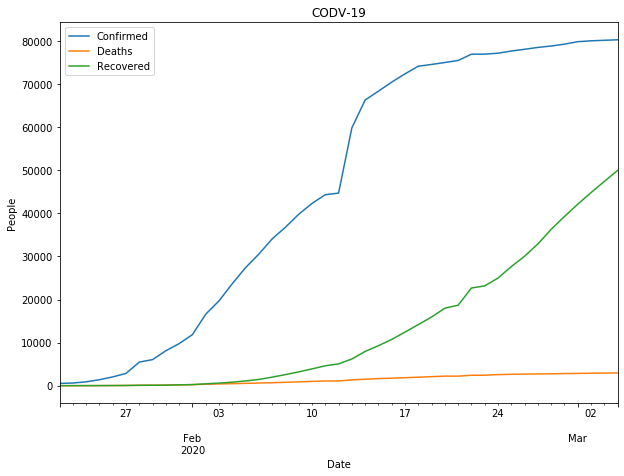

In [ ]:
df_china.plot(figsize = (10,7), title = 'CODV-19')
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

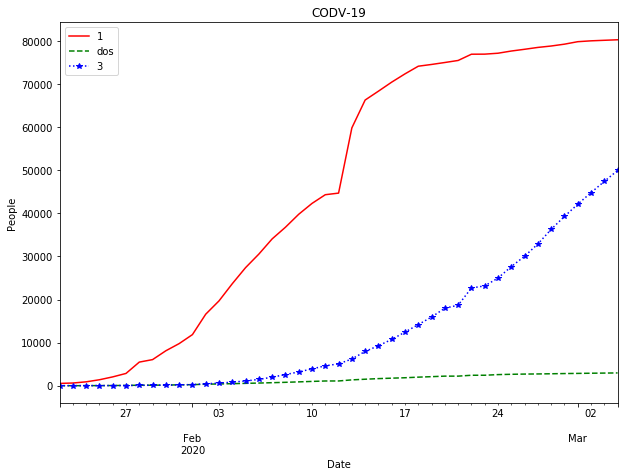

In [ ]:
ax = df_china.plot(figsize = (10,7), title = 'CODV-19',
              legend = False,
              style = ['r-','g--','b:*'])
ax.legend(['1','dos','3'])
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

In [ ]:
df_monthly = df_china.resample('M').max()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9783.0,213.0,214.0
2020-02-29,79251.0,2835.0,39279.0
2020-03-31,80271.0,2981.0,49955.0


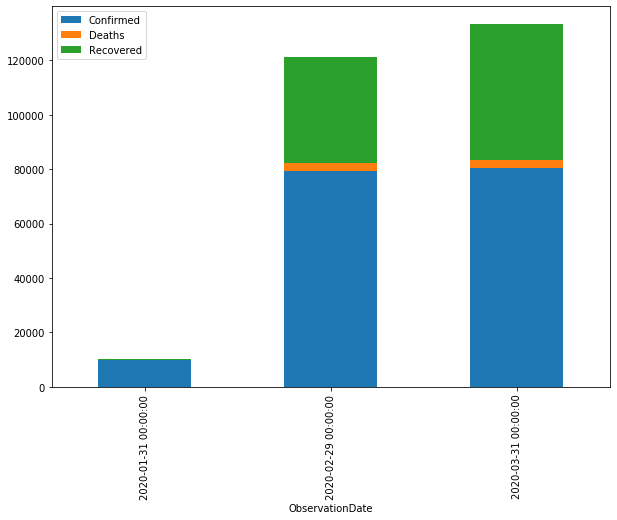

In [ ]:
df_monthly.plot(figsize = (10,7), kind='bar', stacked = True)

In [ ]:
df_monthly['Traitment'] = df_monthly['Confirmed'] - df_monthly['Deaths']- df_monthly['Recovered']
df_monthly

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-01-31,9783.0,213.0,214.0,9356.0
2020-02-29,79251.0,2835.0,39279.0,37137.0
2020-03-31,80271.0,2981.0,49955.0,27335.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efcd369d550>,
      dtype=object)

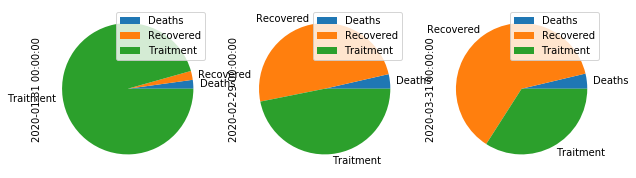

In [ ]:
df_monthly[['Deaths', 'Recovered', 'Traitment']].T.plot(figsize = (10,7), kind = 'pie', subplots=True)

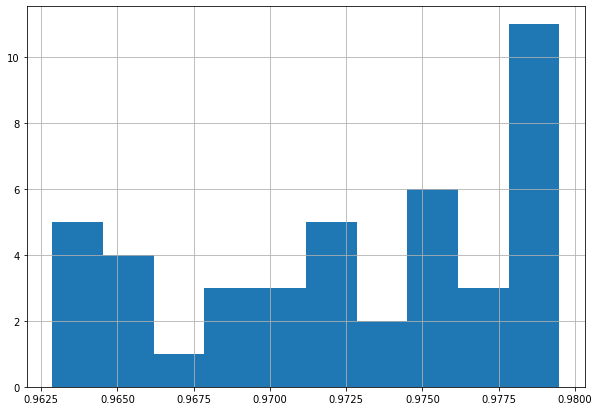

In [ ]:
df_china['rate'] = 1- df_china['Deaths']/df_china['Confirmed']
df_china['rate'].hist(figsize = (10,7), bins = 10)

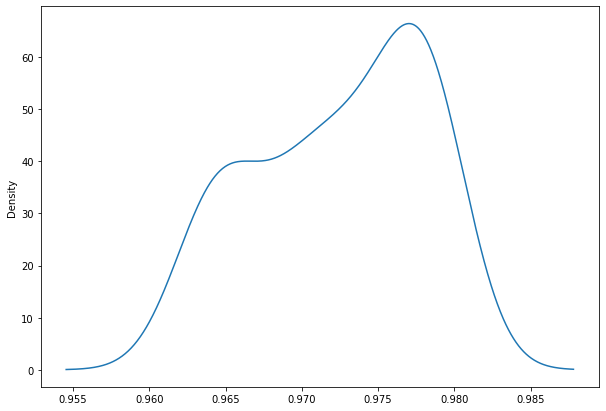

In [ ]:
df_china['rate'].plot(kind = 'kde', figsize = (10,7))